## Assignment 1 - Image search

-Take a user-defined image from the folder

-Calculate the "distance" between the colour histogram of that image and all of the others.

-Find which 3 image are most "similar" to the target image.

-Save an image which shows the target image, the three most similar, and the calculated distance score.

-Save a CSV which has one column for the filename and three columns showing the filenames of the closest images in descending order

In [ ]:
#from + terminal: pip install opencv-python

In [1]:
# We need to include the home directory in our path, so we can read in our own module.
import os
import sys
sys.path.append(os.path.join("..", "..", "CDS-VIS"))
import cv2
import numpy as np
from utils.imutils import jimshow
from utils.imutils import jimshow_channel
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Take a user-defined image from the folder
#Load image
filename = os.path.join("..","..","CDS-VIS", "flowers", "image_0004.jpg")

In [3]:
base_image = cv2.imread(filename)

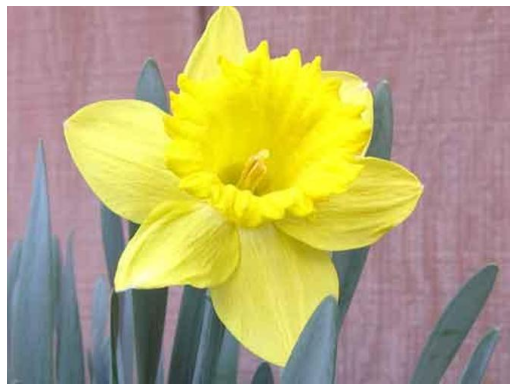

In [4]:
#show the base/target image
jimshow(base_image)

In [5]:
# combining filepaths
path = os.path.join("..","..","CDS-VIS", "flowers")
filenames = os.listdir(path)
for name in filenames: #It finds all filenames of the flower images
    filepath = os.path.join(path, name)
    print(filepath)

../../CDS-VIS/flowers/image_1079.jpg
../../CDS-VIS/flowers/image_0772.jpg
../../CDS-VIS/flowers/image_1307.jpg
../../CDS-VIS/flowers/image_0127.jpg
../../CDS-VIS/flowers/image_0479.jpg
../../CDS-VIS/flowers/image_1250.jpg
../../CDS-VIS/flowers/image_0948.jpg
../../CDS-VIS/flowers/image_0964.jpg
../../CDS-VIS/flowers/image_0953.jpg
../../CDS-VIS/flowers/image_0151.jpg
../../CDS-VIS/flowers/image_0973.jpg
../../CDS-VIS/flowers/image_0724.jpg
../../CDS-VIS/flowers/image_1196.jpg
../../CDS-VIS/flowers/image_0386.jpg
../../CDS-VIS/flowers/image_0692.jpg
../../CDS-VIS/flowers/image_0832.jpg
../../CDS-VIS/flowers/image_0603.jpg
../../CDS-VIS/flowers/image_1261.jpg
../../CDS-VIS/flowers/image_0163.jpg
../../CDS-VIS/flowers/image_0807.jpg
../../CDS-VIS/flowers/image_0894.jpg
../../CDS-VIS/flowers/image_1227.jpg
../../CDS-VIS/flowers/image_1046.jpg
../../CDS-VIS/flowers/image_0100.jpg
../../CDS-VIS/flowers/image_0502.jpg
../../CDS-VIS/flowers/image_1095.jpg
../../CDS-VIS/flowers/image_0268.jpg
.

In [6]:
#finding distance scores
#using compare and normalizations formulas from session_3
distance_score = [] #empty list

filenames = os.listdir(path)

#target image normalization outside of for loop 
hist1 = cv2.calcHist([base_image], [0,1,2], None, [8,8,8], [0,256, 0,256, 0,256])
hist1 = cv2.normalize(hist1, hist1, 0,255, cv2.NORM_MINMAX)

for name in filenames:
    #ignoring non jpgs in the folder
    if name.endswith(".jpg"):
        #target image
        hist1
        # Get the color histogram for one of the image in the folder to compare with the target image
        filepath = os.path.join(path, name)
        other_image = cv2.imread(filepath)
        hist2 = cv2.calcHist([other_image], [0,1,2], None, [8,8,8], [0,256, 0,256, 0,256])
        hist2 = cv2.normalize(hist2, hist2, 0,255, cv2.NORM_MINMAX)
        # Compare target image and one of the images in the folder
        score = round(cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR), 2)
        # Save the distance score
        distance_score.append(score)
    else:
        continue
    
print(distance_score) #takes some time!

[14076597.99, 1554689.81, 8174420.98, 3099727.44, 5565313.76, 5432678.19, 13128.75, 451887.19, 2185163.46, 1574846.94, 378459.36, 4881761.8, 8601810.71, 441108.06, 2676326.46, 5267570.32, 688962.06, 19801220.57, 25671136.65, 14369461.74, 58329.7, 1896125.73, 2557705.26, 530121.18, 5627113.32, 4485881.93, 1338645.21, 413028.96, 47624.16, 630341.11, 467338.44, 3474086.01, 1974716.91, 7668623.82, 8366681.83, 1111360.07, 199400.66, 12358495.08, 518816.07, 1688479.33, 4168078.42, 809886.76, 2334072.04, 9842525.9, 1354281.99, 2893242.48, 3747865.42, 146249.35, 6701743.53, 340373.23, 5309402.42, 8947761.88, 627975.58, 104193.25, 4045965.2, 1135624.0, 4664512.23, 4528605.53, 2899401.0, 4370825.11, 2328729.47, 10673791.18, 24222.97, 9647444.48, 89112.62, 2564624.44, 7598380.54, 612019.46, 1827780.96, 1932287.54, 38732.28, 5955371.64, 4391840.93, 1070564.12, 18391.15, 9170824.49, 1173053.15, 3666405.23, 3718217.03, 2820439.22, 514539.52, 655093.76, 1078811.09, 1198829.0, 5639344.74, 4475851.08, 

In [7]:
#Combining distance scores to the file names of the pictures
list_context=list(zip(filenames, distance_score)) #zip: combining two lists, creating a new list with tuples

# Converting lists of tuples into pandas Dataframe
dframe = pd.DataFrame(list_context, columns=['File names', 'Distance score']) #2 columns
# Printing the data
print(dframe)

          File names  Distance score
0     image_1079.jpg     14076597.99
1     image_0772.jpg      1554689.81
2     image_1307.jpg      8174420.98
3     image_0127.jpg      3099727.44
4     image_0479.jpg      5565313.76
...              ...             ...
1355  image_0475.jpg      7748696.55
1356  image_0682.jpg       823409.15
1357  image_1342.jpg      1086559.11
1358  image_1025.jpg      2268843.74
1359  image_1061.jpg     10016919.86

[1360 rows x 2 columns]


In [8]:
# Finding the 3 most similar images (the 3 with the lowest distance score)
ranked = sorted(distance_score)
print("The values of the three most similar pictures: " + str(ranked[0:4]) + " (the first one is the target picture itself)")

The values of the three most similar pictures: [0.0, 1144.41, 2773.19, 5017.3] (the first one is the target picture itself)


In [9]:
# Finding the file name of the 3 images that are most similar to the target picture
image1 = dframe[dframe['Distance score']==ranked[0]]['File names'].values[0] # This is just the target picture
image1 = (path + image1) #Add the path to the file name
#repeating
image2 = dframe[dframe['Distance score']==ranked[1]]['File names'].values[0]
image2 = (path + image2)
image3 = dframe[dframe['Distance score']==ranked[2]]['File names'].values[0]
image3 = (path + image3)
image4 = dframe[dframe['Distance score']==ranked[3]]['File names'].values[0]
image4 = (path + image4)

In [10]:
#getting the filenames of the closest images in descending order into a csv
ranked = sorted(distance_score)

In [11]:
#into dataframe

desc_dframe=list(zip(filenames, ranked)) #zip: combining two lists, creating a new list with tuples

# Converting lists of tuples into pandas Dataframe
frame = pd.DataFrame(desc_dframe, columns=['File names', 'Sorted Distance score']) #2 columns
# Printing the data
print(frame)

          File names  Sorted Distance score
0     image_1079.jpg                   0.00
1     image_0772.jpg                1144.41
2     image_1307.jpg                2773.19
3     image_0127.jpg                5017.30
4     image_0479.jpg                5258.12
...              ...                    ...
1355  image_0475.jpg            30598224.89
1356  image_0682.jpg            30918802.15
1357  image_1342.jpg            31602890.50
1358  image_1025.jpg            32116721.62
1359  image_1061.jpg            33057395.78

[1360 rows x 2 columns]


In [13]:
#saving the dframe in specific folder
frame.to_csv(os.path.join("..","..","cds-visual", "Assignments", "output", "assign_1.csv"))

print("Done! dframe has been generated and saved in the output folder as assign_1.csv")

Done! dframe has been generated and saved in the output folder as assign_1.csv
